importing dependincies

In [ ]:
import numpy as np  # for numpy arrays
import pandas as pd  #for dataframes/data manupulation and representation
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns
from sklearn.cluster import KMeans  # k means library
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [ ]:
#loading the data from csv file to pandas dataframe
customer_data = pd.read_csv('/content/dataset_2.csv' ,names=['CustomerID','Gender','Age','Annual_Income','Spending_Score','Ware_Pin','Customer_Pin','Zone'], header=0, encoding='utf-8')

In [ ]:
# first five rows in the data frame
customer_data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Ware_Pin,Customer_Pin,Zone
0,1,Male,55,55,72,515631,434011,Kurnool Region
1,2,Male,43,57,44,515631,613712,Kurnool Region
2,3,Female,30,66,31,515631,403813,Kurnool Region
3,4,Female,30,38,92,515581,687163,Kurnool Region
4,5,Female,34,73,23,515581,353527,Kurnool Region


In [ ]:
# finding the number of rows and columns
customer_data.shape

(462, 8)

In [ ]:
#getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      462 non-null    int64 
 1   Gender          462 non-null    object
 2   Age             462 non-null    int64 
 3   Annual_Income   462 non-null    int64 
 4   Spending_Score  462 non-null    int64 
 5   Ware_Pin        462 non-null    int64 
 6   Customer_Pin    462 non-null    int64 
 7   Zone            460 non-null    object
dtypes: int64(6), object(2)
memory usage: 29.0+ KB


In [ ]:
#checking for missing values
customer_data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
Ware_Pin          0
Customer_Pin      0
Zone              2
dtype: int64

In [ ]:
X = customer_data.iloc[:,[3,4]].values #splicing the data , taking only the 3rd and 4th column

In [ ]:
print(X)

For n_clusters = 2 The average silhouette_score is : 0.4501030908768755
For n_clusters = 3 The average silhouette_score is : 0.4204397683865185
For n_clusters = 4 The average silhouette_score is : 0.4049933674155039
For n_clusters = 5 The average silhouette_score is : 0.4116081952655662
For n_clusters = 6 The average silhouette_score is : 0.402872885781395


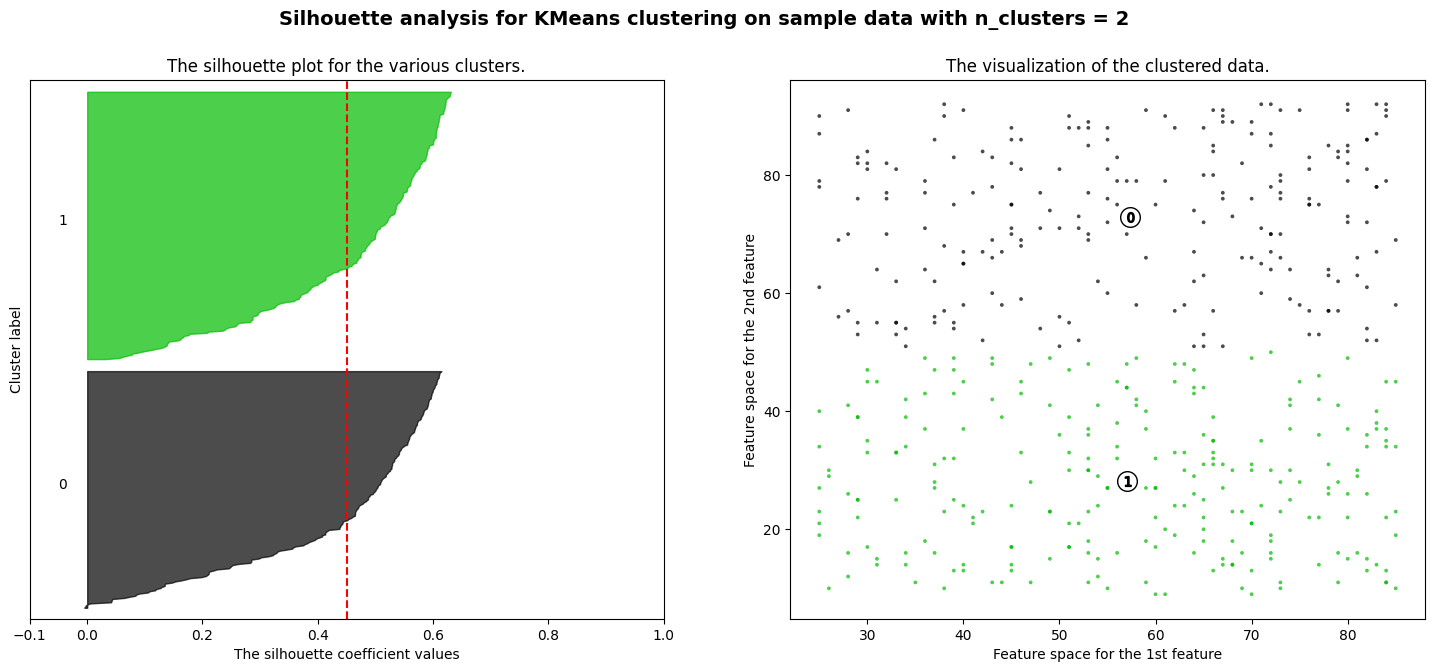

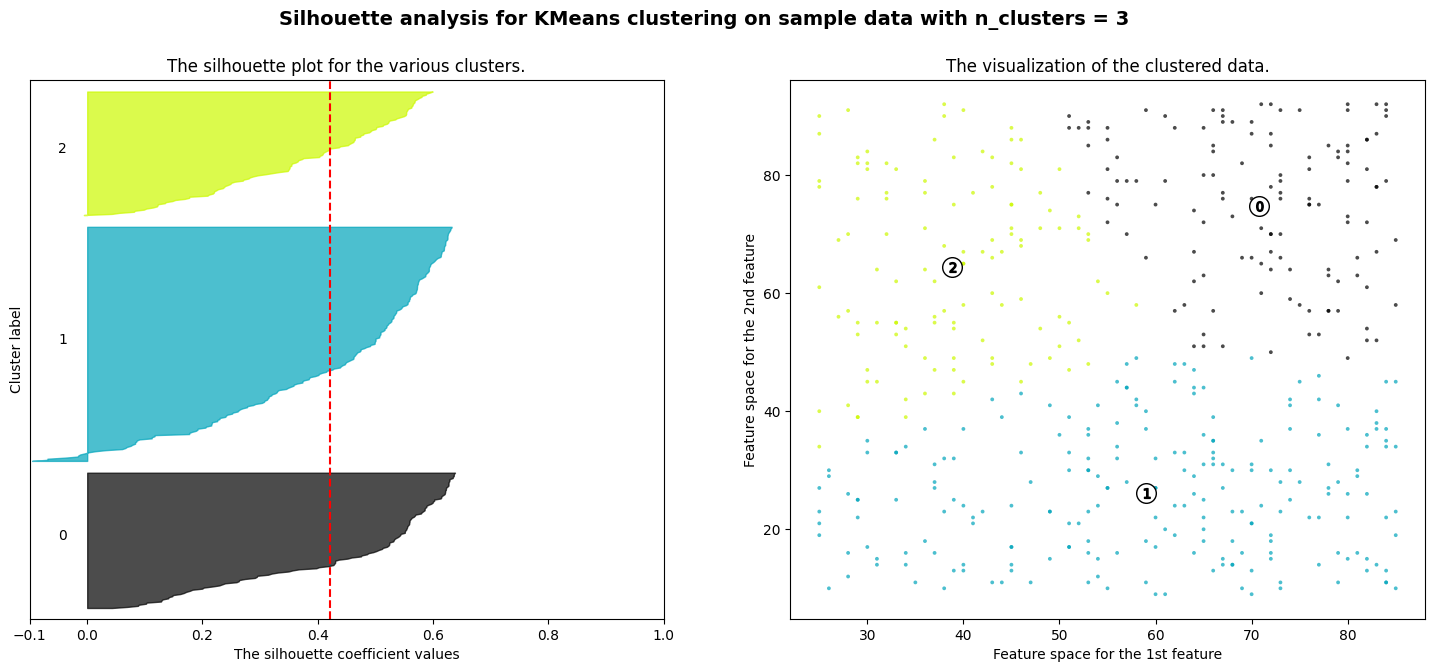

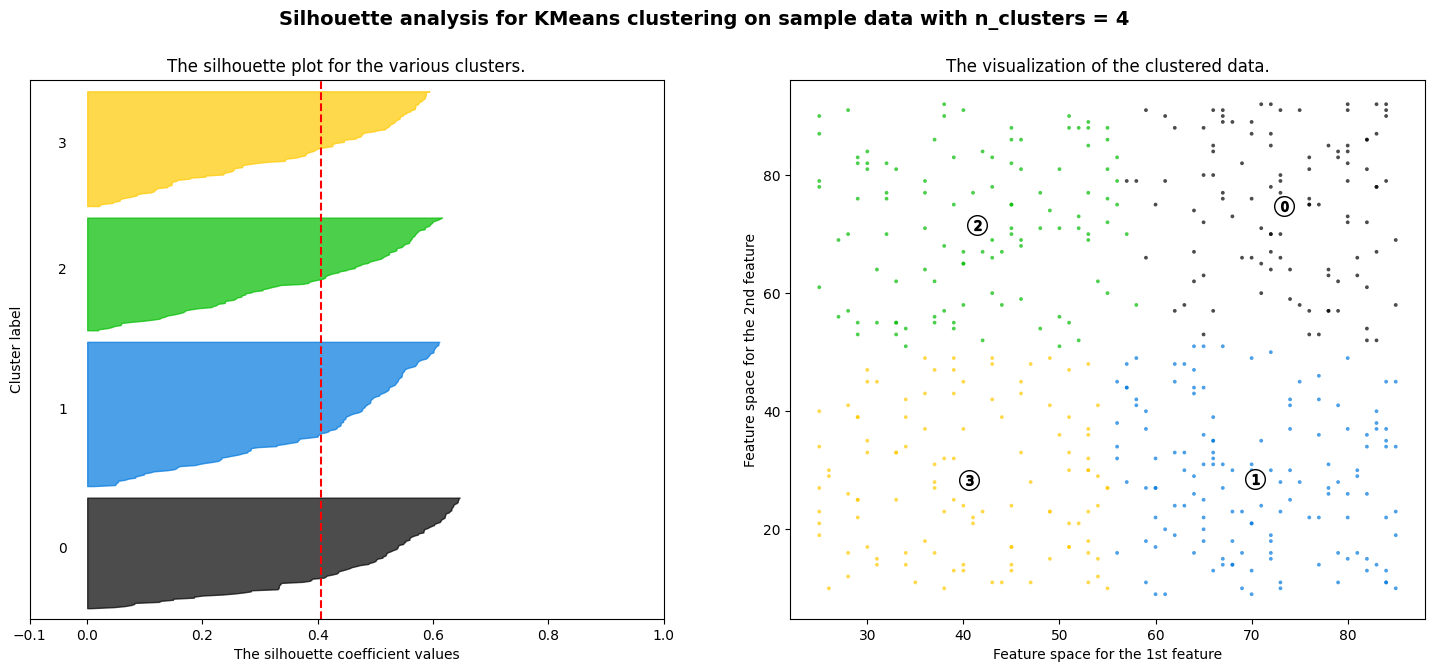

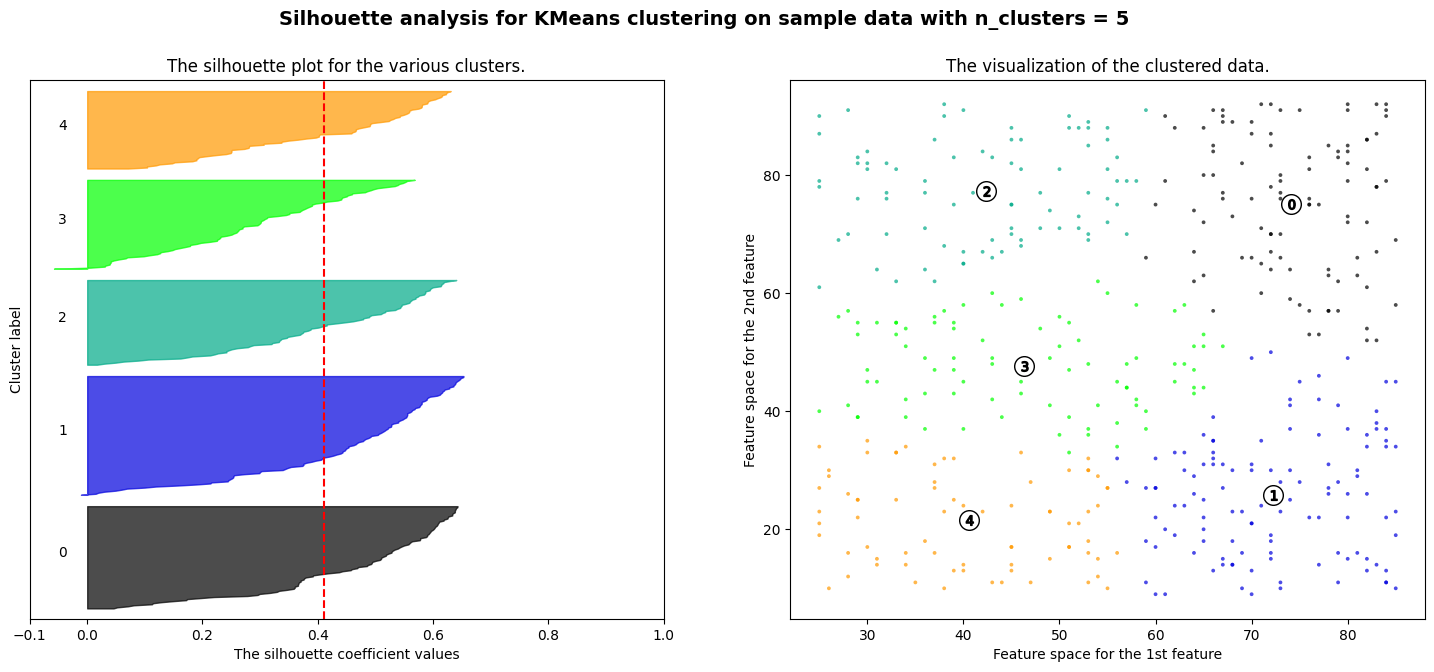

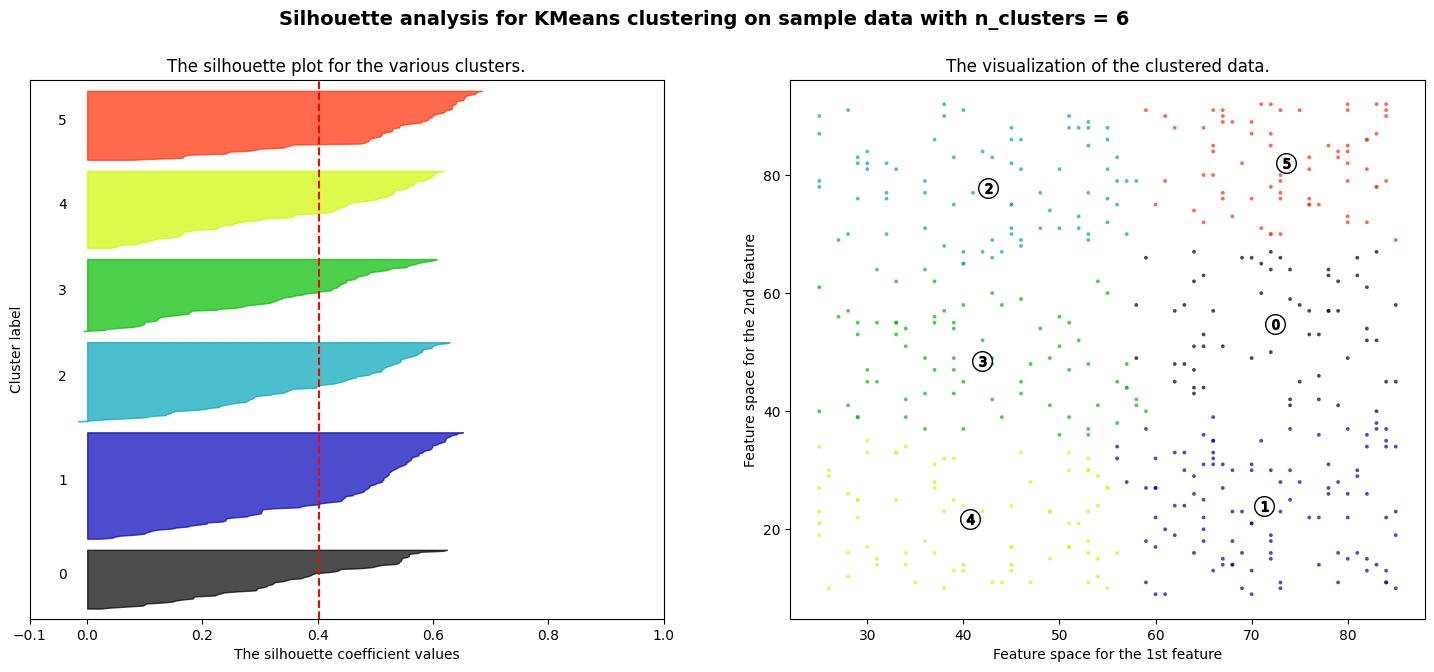

In [ ]:

# load your dataset
#data = customer_data

# select the columns to use as features for clustering
#X = data[['Spending_score', 'Annual_income']]

# set the number of clusters to test
range_n_clusters = [2, 3, 4, 5, 6]

# perform silhouette analysis for each cluster value
for n_clusters in range_n_clusters:
    # create subplots for silhouette plot and cluster visualization
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # set the range for the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # initialize the KMeans clusterer with the current number of clusters
    clusterer = KMeans(n_clusters=n_clusters,n_init="auto",random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # compute the silhouette values for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # aggregate the silhouette values for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # choose a color for the current cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # update the y_lower value for the next cluster
        y_lower = y_upper + 10  # 10 for the 0 samples

    # add labels and title for the silhouette plot
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # add a vertical line for the average silhouette score
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear yaxis labels/ticks for better visualization
    ax1.set_yticks([])

    # set the xaxis ticks for the silhouette plot
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [ ]:
#elbow method for finding wcss value for different number of clusters

wcss = []
silhouette_scores = []

for i in range(2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_) #inertia function lies within the kmeans algorith and gives us the wcss values
  silhouette_scores.append(silhouette_score(X, kmeans.labels_))# Calculate the silhouette score for the current number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

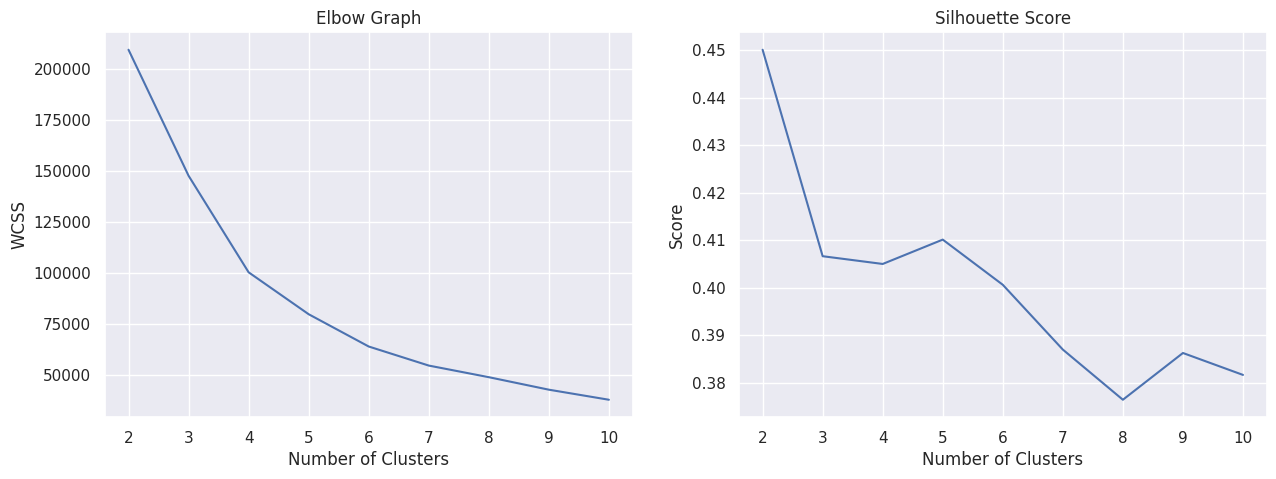

In [ ]:
sns.set()
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(range(2,11),wcss)
ax[0].set_title('Elbow Graph')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('WCSS')

ax[1].plot(range(2,11), silhouette_scores)
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Score')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=0)

#return a label for each data point based on their cluster

Y = kmeans.fit_predict(X)   #returns a cluster number for each of the data points

print(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 4 2 1 2 4 1 4 2 1 4 1 2 3 1 1 1 3 3 3 3 2 2 1 4 1 2 4 4 4 2 0 3 1 2 2 2
 2 1 2 2 3 2 2 2 4 0 3 4 0 2 1 2 3 4 0 2 3 3 0 2 2 0 4 0 3 2 1 1 3 2 4 2 3
 1 2 3 0 4 4 1 3 3 0 3 2 4 2 0 2 4 3 2 2 2 1 2 3 2 3 2 2 2 0 4 2 3 3 4 4 4
 0 0 4 3 3 0 1 3 0 0 2 2 2 1 0 2 4 1 0 1 3 1 2 0 1 2 3 2 1 3 2 2 4 2 1 2 4
 1 2 3 3 3 3 3 1 3 4 4 1 3 4 1 4 3 1 3 0 2 1 4 2 0 1 4 3 1 0 0 1 3 3 1 0 1
 1 4 1 4 4 2 4 2 4 0 0 4 3 2 0 3 1 4 3 2 1 4 0 3 3 4 1 0 2 1 4 4 2 3 4 3 0
 2 0 2 1 3 0 2 0 3 3 4 2 4 2 2 1 1 4 3 2 4 0 2 2 1 1 1 3 4 0 4 1 2 1 2 4 4
 3 2 2 0 3 3 3 2 3 3 1 4 3 0 3 0 3 4 1 2 4 3 0 0 4 2 1 3 4 4 3 1 3 1 2 2 2
 0 2 4 2 0 1 4 2 1 1 2 3 4 2 3 2 1 4 2 0 3 2 3 4 2 0 0 2 4 4 1 2 2 1 2 1 4
 4 0 2 0 0 0 3 1 4 2 4 2 1 4 1 3 0 3 2 0 0 2 2 0 3 0 4 0 2 2 3 1 3 0 0 2 3
 2 0 0 0 3 1 2 0 3 1 3 1 0 2 3 0 2 1 3 2 3 3 2 0 1 4 3 2 0 0 4 2 3 3 4 3 4
 2 3 1 1 4 2 4 4 2 0 3 3 4 3 0 4 4 2 3 1 3 3 2 2 4 0 0 2 3 0 2 1 2 0 0 1 1
 3 3 2 3 0 1 4 2 1 3 2 0 2 0 2 3 0 4]


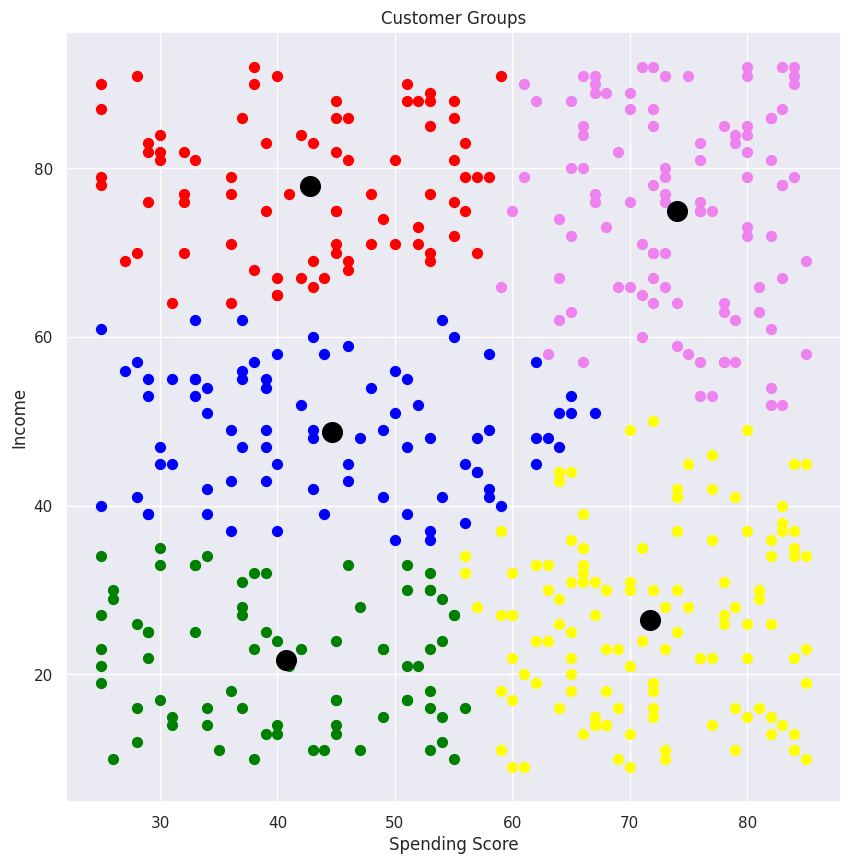

In [ ]:
#plotting all the clusters and their centroids

plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='cyan', label='Cluster 6')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Spending Score')
plt.ylabel('Income')
plt.show()

In [ ]:
# Create data arrays
cluster_centers = kmeans.cluster_centers_
data = np.expm1(cluster_centers)  # NumPy expm1 function returns the exponential value of minus one for each element given inside a NumPy array as output. Therefore, the np.expm1 method accepts arr_name and out arguments and then returns the array as outputs.
points = np.append(data, cluster_centers, axis=1)
points

array([[4.80827857e+17, 2.62490801e+09, 4.07142857e+01, 2.16883117e+01],
       [3.68204508e+18, 7.31328042e+33, 4.27500000e+01, 7.79750000e+01],
       [1.46256639e+31, 3.03308577e+11, 7.17603306e+01, 2.64380165e+01],
       [1.42886580e+32, 3.69646159e+32, 7.40396040e+01, 7.49900990e+01],
       [2.46325992e+19, 1.46323949e+21, 4.46506024e+01, 4.87349398e+01]])

In [ ]:
# Add "clusters" to customers data
points = np.append(points, [[0], [1], [2],[3],[4]], axis=1)
customer_data["clusters"] = kmeans.labels_

In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Ware_Pin,Customer_Pin,Zone,clusters
0,1,Male,55,55,72,515631,434011,Kurnool Region,1
1,2,Male,43,57,44,515631,613712,Kurnool Region,4
2,3,Female,30,66,31,515631,403813,Kurnool Region,2
3,4,Female,30,38,92,515581,687163,Kurnool Region,1
4,5,Female,34,73,23,515581,353527,Kurnool Region,2


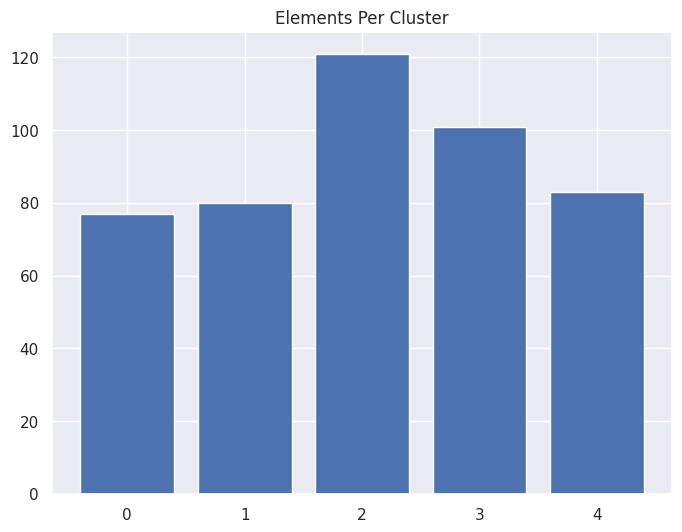

In [ ]:
valcount = customer_data.clusters.value_counts()
plt.figure(figsize=(8,6))
plt.bar(valcount.index,valcount.values)
176
plt.title('Elements Per Cluster')
plt.show()

data collection and analysis

FOR INCOME VS SPENDING SCORE

CALCULATING AND VISUALIZING SILHOUTTE VALUE FOR EACH POSSIBLE NUMBER OF CLUSTERS (DO NOT CHANGE ANYTHING IN THIS CODE)

To choose the correct number of clusters

WCSS-> within sum of squares

(EKHANEO NO CHANGE)

Plotting an elbow and silhouette score graph

(no change here )

Optimum number of clusters = n (EKHANE VALUE CHANGE KORBI AFTER ANALYSING ALL THE ABOVE GRAPHS)

n_clusters er value oh change korbi tokhon

training the k means model

visualising the clusters

Adding a new column called clusters to the dataframe

BAR GRAPH for no of elements in each clusters